In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
pd.options.display.max_columns =100
sns.set()
print(tf.__version__)

2.0.0


In [2]:
# Load Dataset
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# Convert data into dataframe
features = pd.DataFrame(data['data'],columns=data['feature_names'])
features.sample(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
408,7.40389,0.0,18.10,0.0,0.597,5.617,97.9,1.4547,24.0,666.0,20.2,314.64,26.40
170,1.20742,0.0,19.58,0.0,0.605,5.875,94.6,2.4259,5.0,403.0,14.7,292.29,14.43
490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,318.43,29.68


In [4]:
# Target column
target = data['target']
target[0:3]

array([24. , 21.6, 34.7])

In [5]:
features.shape, target.shape

((506, 13), (506,))

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [7]:
# scaling input vector space
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [8]:
# define learning schedule
# learning rate scheduler
def schedule(epoch, lr):
    if epoch >=50:
        new_lr = 0.0001
    else:
        new_lr = lr
    return lr

# create Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(X_train.shape[1],)))
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.5), loss='mse',metrics=['mse'])


# add learning schedule call back
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [9]:
# Train the model
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, callbacks=[scheduler],)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 1s 2ms/sample - loss: 571.3212 - mse: 571.3212 - val_loss: 466.7889 - val_mse: 466.7889
Epoch 2/200
404/404 [==============================] - 0s 116us/sample - loss: 509.1658 - mse: 509.1658 - val_loss: 413.6768 - val_mse: 413.6767
Epoch 3/200
404/404 [==============================] - 0s 116us/sample - loss: 456.3197 - mse: 456.3197 - val_loss: 369.2525 - val_mse: 369.2525
Epoch 4/200
404/404 [==============================] - 0s 116us/sample - loss: 410.5253 - mse: 410.5253 - val_loss: 331.0914 - val_mse: 331.0914
Epoch 5/200
404/404 [==============================] - 0s 155us/sample - loss: 370.4261 - mse: 370.4261 - val_loss: 297.1777 - val_mse: 297.1777
Epoch 6/200
404/404 [==============================] - 0s 155us/sample - loss: 334.7789 - mse: 334.7789 - val_loss: 267.3746 - val_mse: 267.3745
Epoch 7/200
404/404 [==============================] - 0s 116us/sample - loss: 303.288

Epoch 58/200
404/404 [==============================] - 0s 116us/sample - loss: 24.1319 - mse: 24.1319 - val_loss: 27.3755 - val_mse: 27.3755
Epoch 59/200
404/404 [==============================] - 0s 116us/sample - loss: 23.9837 - mse: 23.9837 - val_loss: 27.4087 - val_mse: 27.4087
Epoch 60/200
404/404 [==============================] - 0s 116us/sample - loss: 23.8256 - mse: 23.8256 - val_loss: 27.3945 - val_mse: 27.3945
Epoch 61/200
404/404 [==============================] - 0s 116us/sample - loss: 23.7363 - mse: 23.7363 - val_loss: 27.4231 - val_mse: 27.4231
Epoch 62/200
404/404 [==============================] - 0s 116us/sample - loss: 23.6205 - mse: 23.6205 - val_loss: 27.5246 - val_mse: 27.5246
Epoch 63/200
404/404 [==============================] - 0s 117us/sample - loss: 23.4986 - mse: 23.4986 - val_loss: 27.5530 - val_mse: 27.5530
Epoch 64/200
404/404 [==============================] - 0s 115us/sample - loss: 23.4283 - mse: 23.4283 - val_loss: 27.5083 - val_mse: 27.5083
Epoch 

404/404 [==============================] - 0s 155us/sample - loss: 22.1943 - mse: 22.1943 - val_loss: 28.5324 - val_mse: 28.5324
Epoch 116/200
404/404 [==============================] - 0s 116us/sample - loss: 22.1723 - mse: 22.1723 - val_loss: 28.5122 - val_mse: 28.5122
Epoch 117/200
404/404 [==============================] - 0s 116us/sample - loss: 22.1954 - mse: 22.1954 - val_loss: 28.5003 - val_mse: 28.5003
Epoch 118/200
404/404 [==============================] - 0s 116us/sample - loss: 22.1643 - mse: 22.1643 - val_loss: 28.4869 - val_mse: 28.4869
Epoch 119/200
404/404 [==============================] - 0s 116us/sample - loss: 22.1613 - mse: 22.1613 - val_loss: 28.4942 - val_mse: 28.4942
Epoch 120/200
404/404 [==============================] - 0s 155us/sample - loss: 22.1584 - mse: 22.1584 - val_loss: 28.5100 - val_mse: 28.5100
Epoch 121/200
404/404 [==============================] - 0s 116us/sample - loss: 22.1681 - mse: 22.1681 - val_loss: 28.5108 - val_mse: 28.5107
Epoch 122/200

404/404 [==============================] - 0s 123us/sample - loss: 21.9577 - mse: 21.9577 - val_loss: 28.3082 - val_mse: 28.3082
Epoch 173/200
404/404 [==============================] - 0s 159us/sample - loss: 21.9421 - mse: 21.9421 - val_loss: 28.3268 - val_mse: 28.3268
Epoch 174/200
404/404 [==============================] - 0s 116us/sample - loss: 21.9447 - mse: 21.9447 - val_loss: 28.3340 - val_mse: 28.3340
Epoch 175/200
404/404 [==============================] - 0s 116us/sample - loss: 21.9584 - mse: 21.9584 - val_loss: 28.3555 - val_mse: 28.3555
Epoch 176/200
404/404 [==============================] - 0s 116us/sample - loss: 21.9482 - mse: 21.9482 - val_loss: 28.2759 - val_mse: 28.2759
Epoch 177/200
404/404 [==============================] - 0s 117us/sample - loss: 21.9306 - mse: 21.9306 - val_loss: 28.2906 - val_mse: 28.2906
Epoch 178/200
404/404 [==============================] - 0s 115us/sample - loss: 21.9340 - mse: 21.9340 - val_loss: 28.2977 - val_mse: 28.2977
Epoch 179/200

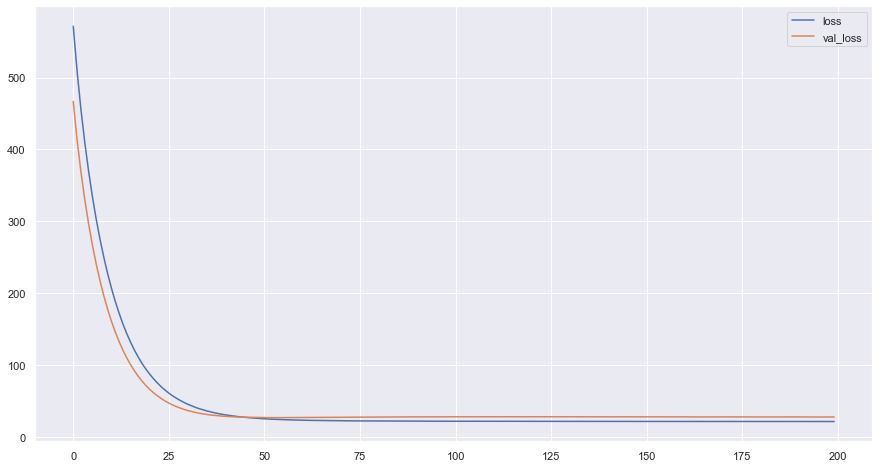

In [10]:
# plot loss 
plt.figure(figsize=(15,8))
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [11]:
# prediction
predict = model.predict(X_test)
print('R2 Square for Test is {}'.format(r2_score(y_test,predict)))
print('Mean Square error for Test is {}'.format(mean_squared_error(y_test,predict)))

R2 Square for Test is 0.6158754583556956
Mean Square error for Test is 28.16930584350186


In [13]:
# saving model to file
model.save('model.h5')

In [14]:
# load the model
# issue with model load when input layer is used instead of input shape
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('model.h5')
print(model.layers)
model.evaluate(X_test, y_test)

102/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[28.16930524040671, 28.169304]